In [1]:
%pip install rebound

Note: you may need to restart the kernel to use updated packages.


In [2]:
a= [ 0.0677, 0.1189, 0.1662 , 0.2138, 0.2535] #au

In [3]:
import rebound
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [116]:
mass_earth = 3*10**-6 #solar masses
start_x = [0.06769998,  1.18900000e-01  , 0.1662    , 0.2138    , 0.2535]
start_y = [5.01579636e-05,0,  3.76400590e-05, 1.23601018e-05, 2.72122722e-06]
v0x = np.array( [0.07462658395619551, 0.05659626765330703, 0.04790208125104128, 0.04224355397579091, 0.03884847500678671])
v0x= [0.0746266044379049,0.05659626765330703,0.04790208247950675,0.042243554046383504,0.038848475009025]
v0y = np.array([5.52897859478072e-05, 0.0, 1.0848599329982713e-05, 2.4421638303104e-06, 4.170237775156792e-07])
P = [ 5.7,  13.2,21.8,31.8, 41]
v0y = np.zeros(5)

theta = [0.000740885792975013, 0, 0.00022647448422232177, 5.781151436712105e-05, 1.073462413715875e-05]

In [125]:
help(rebound.Simulation().add)

Help on method add in module rebound.simulation:

add(particle=None, **kwargs) method of rebound.simulation.Simulation instance
    Adds a particle to REBOUND. Accepts one of the following:
    
    1) A single Particle structure.
    2) The particle's mass and a set of cartesian coordinates: m,x,y,z,vx,vy,vz.
    3) The primary as a Particle structure, the particle's mass and a set of orbital elements: primary,m,a,anom,e,omega,inv,Omega,MEAN (see :class:`.Orbit` for the definition of orbital elements).
    4) A name of an object (uses NASA Horizons to look up coordinates)
    5) A list of particles or names.



In [130]:
kep33 = rebound.Simulation() # This sets up our system
# kep33.integrator = 'whfast'

# hmmm what units?
# star = kep33.add(m=1.29,x=0,y=0,z=0) #star
# kepb = kep33.add(m=3.68*mass_earth,x = start_x[0] , y =  start_y[0], z = 0, vx = v0x[0],vy= v0y[0], P =P[0],a=a[0]) #closest
# kepc = kep33.add(m=0.39*mass_earth,x = start_x[1] , y =start_y[1],z = 0 ,vx = v0x[1], vy = v0y[1], P=P[1],a=a[1])
# kepd = kep33.add(m=3.91*mass_earth,x = start_x[2] , y = start_y[2] ,z = 0 ,vx = v0x[2],vy = v0y[2],P=P[2],a=a[2])
# kepe = kep33.add(m=5.57*mass_earth,x = start_x[3], y = start_y[3] ,z = 0,vx = v0x[3], vy= v0y[3],P=P[3],a=a[3])
# kepf = kep33.add(m=9.6*mass_earth, x = start_x[4] , y = start_y[4] ,z = 0,vx = v0x[4], vy= v0y[4],P=P[4],a=a[4]) #farthest




star = kep33.add(m=1.29)#,x=0,y=0,z=0) #star
kepb = kep33.add(m=3.68*mass_earth,a=a[0], f=theta[0]) #closest
kepc = kep33.add(m=0.39*mass_earth,a=a[1], f= theta[1])
kepd = kep33.add(m=3.91*mass_earth,a=a[2], f= theta[2])
kepe = kep33.add(m=5.57*mass_earth,a=a[3],f= theta[3])
kepf = kep33.add(m=9.6*mass_earth, a=a[4], f= theta[4]) #farthest



kep33.move_to_com() # Moving our system to the centre of mass frame, which should be in the star.

In [119]:
print(kep33.particles[1].y)

5.015697123383606e-05


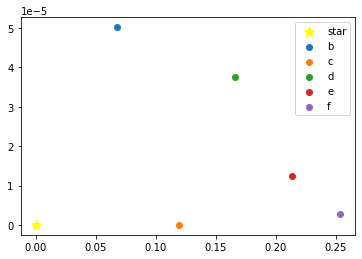

In [120]:
plt.scatter(kep33.particles[0].x,kep33.particles[0].y, label = 'star',s=100,marker =(5,1),color = 'yellow')
plt.scatter(kep33.particles[1].x,kep33.particles[1].y, label = 'b')
plt.scatter(kep33.particles[2].x,kep33.particles[2].y, label = 'c')
plt.scatter(kep33.particles[3].x,kep33.particles[3].y, label = 'd')
plt.scatter(kep33.particles[4].x,kep33.particles[4].y, label = 'e')
plt.scatter(kep33.particles[5].x,kep33.particles[5].y, label = 'f')
plt.legend()


In [146]:

times = np.arange(0,200,0.01) # 30 randomly spaced observations
N = len(times) 

p1,p2,p3,p4,p5 = np.zeros((N,2)), np.zeros((N,2)),np.zeros((N,2)),np.zeros((N,2)),np.zeros((N,2))

for i, t in enumerate(times):
    kep33.integrate(times[i])
    
    p1[i] = np.array([kep33.particles[1].x, kep33.particles[1].y])
    p2[i] = np.array([kep33.particles[2].x, kep33.particles[2].y])
    p3[i] = np.array([kep33.particles[3].x, kep33.particles[3].y])
    p4[i] = np.array([kep33.particles[4].x, kep33.particles[4].y])
    p5[i] = np.array([kep33.particles[5].x, kep33.particles[5].y])

        


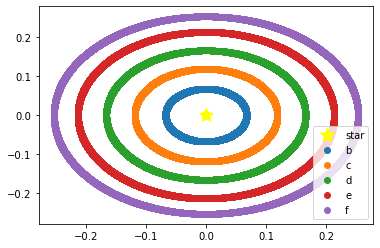

In [147]:
plt.scatter(kep33.particles[0].x,kep33.particles[0].y, label = 'star',s=200,marker =(5,1),color = 'yellow')
plt.scatter(p1[:, 0], p1[:, 1], label = 'b')
plt.scatter(p2[:, 0], p2[:, 1], label = 'c')
plt.scatter(p3[:, 0], p3[:, 1], label = 'd')
plt.scatter(p4[:, 0], p4[:, 1], label = 'e')
plt.scatter(p5[:, 0], p5[:, 1], label = 'f')
plt.legend()


plt.show()


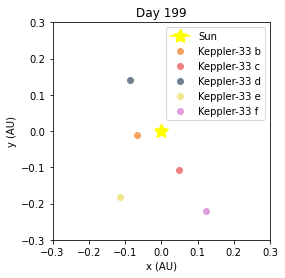

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import rebound

earth_radius = 4.258756e-5
jupiter_radius

# Create a list of planets with their colors and names for visualization
planet_properties = [
    {'color': 'sandybrown', 'name': 'Keppler-33 b','radius': 1.74*earth_radius},
    {'color': 'lightcoral', 'name': 'Keppler-33 c','radius': 3.2*earth_radius},
    {'color': 'slategray', 'name': 'Keppler-33 d','radius': 0.477 x Jupiter},
    {'color': 'khaki', 'name': 'Keppler-33 e','radius': 0.359 x Jupiter},
    {'color': 'plum', 'name': 'Keppler-33 f','radius', 0.398 x Jupiter},
]

sun =1.82 x Our Sun radius   

planets_positions = [p1,p2,p3,p4,p5]


# Create a figure for plotting
fig, ax = plt.subplots()
ax.set_xlim(-0.3, 0.3)
ax.set_ylim(-0.3, 0.3)
ax.set_aspect('equal')
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')


# Plotting function to update positions
call_counter = 0
def update(frame):
    global call_counter 
        
    call_counter += 1

    # Clear the previous plot
    ax.clear()
    
    # Re-draw the axes
    ax.set_xlim(-0.3, 0.3)
    ax.set_ylim(-0.3, 0.3)
    ax.set_aspect('equal')
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')
    
    ax.plot(0, 0, marker=(5,1), color='yellow', markersize=15, label='Sun')  # Sun at the center

    # Update the positions of each planet
    for i, planet in enumerate(planets_positions): 
        x, y = planet[:,0][call_counter-1],planet[:,1][call_counter-1]
        ax.plot(x, y, marker='o', color=planet_properties[i]['color'], label=planet_properties[i]['name'], linestyle='None')
    
    # Add legend and title
    ax.legend(loc='upper right')
    ax.set_title(f"Day {frame}")

# Create an animation object
ani = FuncAnimation(fig, update, frames=np.arange(0, 200, 1), interval=50, repeat=False)

# Display the animation inline in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())
